# CASE STUDY IN Python:

## The objective of this dashboard is to understand sales trends for one of the leading pharmaceutical company.

### The client would like to come see a dynamic dashboard with different KPI's at different levels (National, Region & Territory etc). Create the below charts as these would help us explore the past data in a better manner and give a good picture of the progress and failures. This in turn would catalyse the decision-making process, making it easier, simpler and accurate.


### ABOUT DATA:
#### The data attached is a two-year sales data of a pharma company which talks about sales in 2015 and 2016 across various regions and time frames.
#### Account Id            : Customer ID 
#### Account Name    : Customer Name 
#### Tier                        : Customer Segment
#### Sales 2015            : Sales for the year 2015
#### Sales 2016            : Sales for the year 2016
#### Units 2015           : No of Units sold for 2015
#### Units 2016           : No of Units sold for 2016


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Importing Sales Data from the folder
Sales = pd.read_csv("E:Datasets/SalesData.csv",sep=",")
Sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### Exploratory Data Analysis

In [3]:
Sales.shape

(3709, 14)

In [4]:
Sales.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [5]:
Sales.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [6]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [40]:
#Groupby based on Region for Sales in 2015 and 2016
Region_Sales = Sales.groupby(by=["Region"]).aggregate({"Sales2016":"sum","Sales2015":"sum"})
Region_Sales = Region_Sales.round(decimals=0)
Region_Sales

,Sales2016,Sales2015
Region,,
Central,9787809.0,7891729.0
East,12667230.0,9512916.0
West,7209689.0,5349745.0


#### Bar chart of sales in different regions during 2015-16 

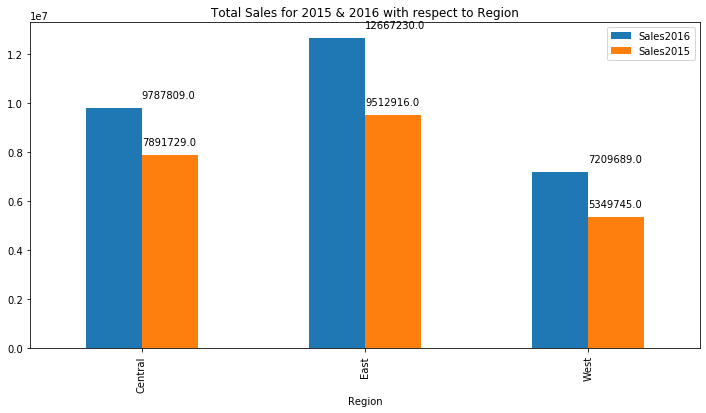

In [59]:
Region_Sales_graph=  Region_Sales.plot.bar(figsize=(12,6))
plt.title("Total Sales for 2015 & 2016 with respect to Region")
for idx,label in enumerate(list(Region_Sales.index)):
        for acc in Region_Sales.columns:
            value = np.round(Region_Sales.iloc[idx][acc],decimals = 2)
            Region_Sales_graph.annotate(value,
                                       (idx,value),
                                       xytext = (0,10),
                                       textcoords = "offset points")

#### Conclusion

In [53]:
print("We can conclude that sales in 2016 is more compared to 2015 in all regions.East Region has contributed the maximum")

We can conclude that sales in 2016 is more compared to 2015 in all regions.East Region has contributed the maximum


#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart


In [54]:
#Grouping the data based on Region for sales in 2016
Sales_Pie_2016 = Sales.groupby(by=["Region"])[["Sales2016"]].sum()
Sales_Pie_2016

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


#### Pie chart of sales for different regions in 2016

C:\Users\yrp62\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


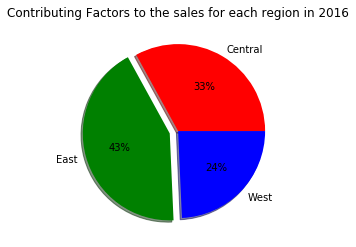

In [55]:
#Plotitng Pie chart using pyplot
plt.pie(Sales_Pie_2016, 
            labels=["Central","East","West"], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%',shadow=True, # to get percentage and round off appropriately
            explode=[0.0,0.1,0.0], 
            )
plt.title("Contributing Factors to the sales for each region in 2016")
plt.show()

#### Conclusion

In [56]:
print("East region has contributed the maximum in 2016")

East region has contributed the maximum in 2016


#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers



In [57]:
#Grouping the data based on Region and Tier for sales in 2015-16
Region_Tiers_Sales = Sales.groupby(by=["Region","Tier"]).aggregate({"Sales2016":"sum","Sales2015":"sum"})
Region_Tiers_Sales

Sales2016     Sales2015
Region  Tier                            
Central High  6.026043e+06  4.798698e+06
        Low   1.132833e+06  9.434397e+05
        Med   2.632181e+06  2.068226e+06
        Out  -3.248530e+03  8.136489e+04
East    High  7.817151e+06  6.102946e+06
        Low   1.144930e+06  9.016658e+05
        Med   3.705150e+06  2.470998e+06
        Out   0.000000e+00  3.730655e+04
West    High  3.768038e+06  2.944789e+06
        Low   1.099502e+06  6.710644e+05
        Med   2.342149e+06  1.718476e+06
        Out   0.000000e+00  1.541508e+04

#### Bar chart for total sales in 2015-16 based on Region and Tiers

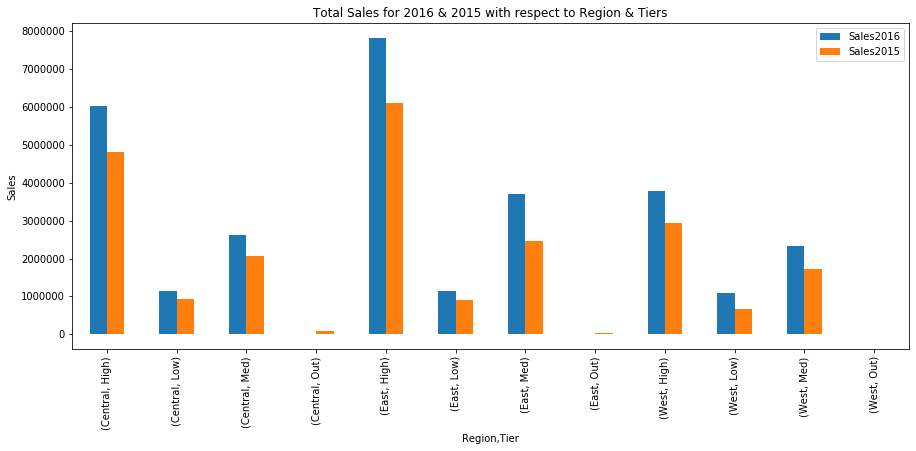

In [60]:
Region_Tiers_Sales.plot(kind="bar",figsize=(15,6))
plt.ylabel("Sales")
plt.title("Total Sales for 2016 & 2015 with respect to Region & Tiers")
plt.show()

In [61]:
print("We can conclude that East region and High Tier in 2016 have contributed the maximum." 
      "Also Sales in 2015 and Sales in 2016 both are maximum in East Region and High Tier")

We can conclude that East region and High Tier in 2016 have contributed the maximum.Also Sales in 2015 and Sales in 2016 both are maximum in East Region and High Tier


#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [62]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [63]:
#Grouping Region and State columns to find total sales in 2015 & 2016 accordingly
Sales_State = Sales.groupby(by=["Region","State"])[["Sales2016","Sales2015"]].sum()

In [64]:
Sales_State

Sales2016     Sales2015
Region  State                            
Central AL     5.958284e+05  5.091037e+05
        AR     2.276081e+05  2.133175e+05
        IL     7.843074e+05  6.217938e+05
        IN     5.996723e+05  3.166781e+05
        KY     6.332189e+05  5.312149e+05
        LA     6.803033e+05  4.793662e+05
        MI     7.072480e+05  5.686517e+05
        MS     2.204109e+05  3.045782e+05
        OH     1.221085e+06  9.276875e+05
        OK     3.396445e+05  2.484607e+05
        PA     2.877924e+05  3.002670e+05
        TN     5.522301e+05  4.370386e+05
        TX     2.013116e+06  1.712440e+06
        WI     4.403802e+05  3.044250e+05
        WV     4.849640e+05  4.167062e+05
East    CT     3.235023e+05  1.972028e+05
        DC     2.574217e+05  2.167240e+05
        FL     2.508232e+06  1.660162e+06
        GA     9.469198e+05  6.815465e+05
        MA     6.870964e+05  4.192788e+05
        MD     7.500088e+05  5.273091e+05
        ME     1.836731e+05  7.742564e+04
        NC     1.610521e+06  1.292802e+06
        NH     1.447175e+05  1.364194e+05
        NJ     7.822892e+05  5.204193e+05
        NY     1.703136e+06  1.725415e+06
        PA     8.943195e+05  7.850928e+05
        RI     1.624546e+05  1.563118e+05
        SC     4.634141e+05  2.478118e+05
        TN     7.010941e+04  4.967700e+04
        VA     1.179415e+06  8.193191e+05
West    AZ     5.195079e+05  3.889876e+05
        CA     2.396883e+06  1.891621e+06
        CO     5.046536e+05  4.023385e+05
        IA     1.461603e+05  1.022714e+05
        ID     1.157684e+05  9.237388e+04
        IL     1.224796e+05  9.375350e+04
        KS     2.850207e+05  2.284577e+05
        MN     3.220523e+05  3.142297e+05
        MO     7.241663e+05  4.444618e+05
        NE     8.587284e+04  6.981622e+04
        NM     1.325122e+05  8.828041e+04
        NV     2.814234e+05  2.057940e+05
        OR     4.383578e+05  2.629237e+05
        SD     1.662565e+05  7.549041e+04
        TX     3.495791e+05  2.530733e+05
        UT     1.732097e+05  1.133622e+05
        WA     4.457855e+05  3.225094e+05

In [65]:
#Filtering out East region Sales in 2015 and 2016
Sales_East = Sales_State.loc["East"]
Sales_East

,Sales2016,Sales2015
State,,
CT,323502.31,197202.790
DC,257421.69,216723.950
FL,2508232.28,1660162.000
GA,946919.77,681546.460
MA,687096.45,419278.750
MD,750008.79,527309.060
ME,183673.05,77425.640
NC,1610521.00,1292801.640
NH,144717.51,136419.380


#### Bar chart for sales during year 2015-16 of East region

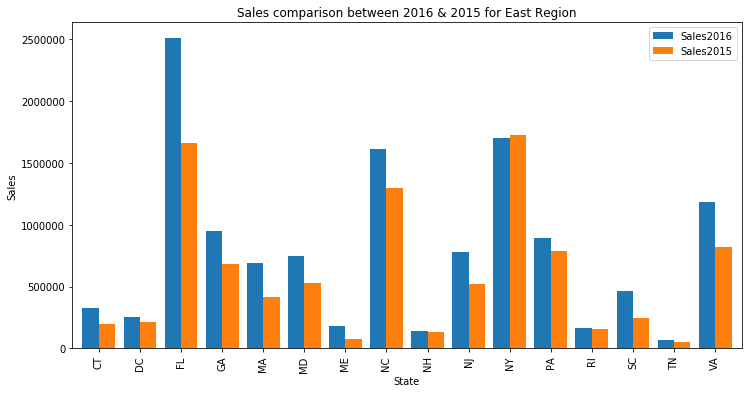

In [66]:
Sales_East.plot(kind="bar",figsize=(12,6),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2016 & 2015 for East Region")
plt.show()

In [67]:
print("NY state registered a decline in Sales in 2016 as compared to 2015")

NY state registered a decline in Sales in 2016 as compared to 2015


#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [68]:
Sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [69]:
#Grouping the Data based on Tier and Division to find the Total Units sold in 2016 as compared to 2015
Sales_Division_Tier = Sales.groupby(by=["Tier","Division"])[["Units2015","Units2016"]].sum()
Sales_Division_Tier

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [70]:
High_Tier = Sales_Division_Tier.loc["High"]
High_Tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


#### Bar chart for all divisions of units of 2015-16

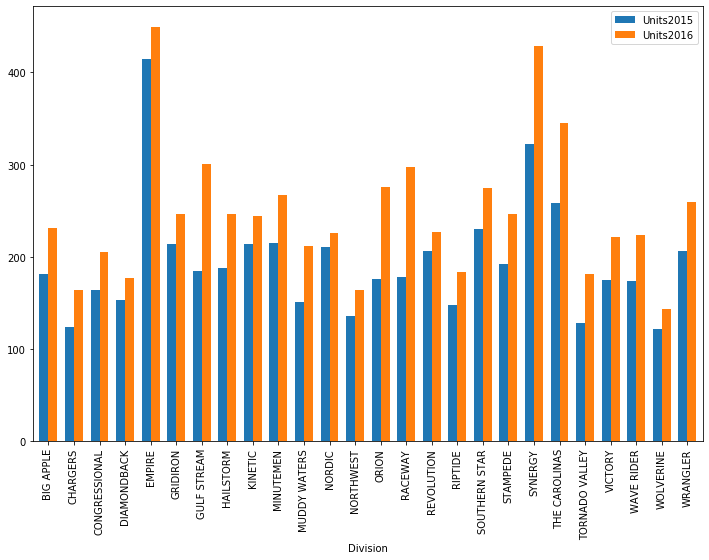

In [71]:
High_Tier.plot(kind="bar",figsize=(12,8),width=0.7)


In [72]:
print("No division show decline in number of units sold in 2016 compared to 2015")

No division show decline in number of units sold in 2016 compared to 2015


#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. 
 ####       The Quarters are based on months and defined as -

-  Jan - Mar : Q1
-  Apr - Jun : Q2
-  Jul - Sep : Q3
-  Oct - Dec : Q4


In [73]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [74]:
month = Sales["Month"]

In [75]:
quarter=[]
for x in month:
    if x in ["Jan","Feb","March"]:
        quarter.append("Q1")
    elif x in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif x in ["Jul","Aug","Sep"]:
        quarter.append("Q3")    
    else:
        quarter.append("Q4")

#### New Column

In [79]:
quarter

['Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q3',
 'Q3',
 'Q1',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q2',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q3',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q2',
 'Q2',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q4',
 'Q4',
 'Q1',
 'Q3',
 'Q2',
 'Q3',
 'Q4',
 'Q2',
 'Q3',
 'Q3',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q3',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q2',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q2',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q1',
 'Q4',
 'Q1',
 'Q2',
 'Q1',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q4',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q2',

In [80]:
#Creating new column "Qtr"
Sales["Qtr"]=pd.Series(quarter)

In [81]:
Sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


#### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [82]:
#Grouping Data based on "Qtr" to find Total Sales in 2015 and 2016
Qtr_Sales = Sales.groupby(by="Qtr")[["Sales2015","Sales2016"]].sum()

In [83]:
Qtr_Sales

,Sales2015,Sales2016
Qtr,,
Q1,3.531824e+06,4.594604e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,7.667610e+06,9.971217e+06


#### Bar chart for quarter wise sales in 2012-16

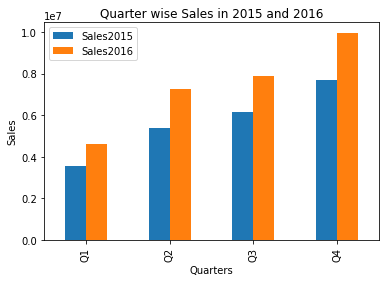

In [84]:
Qtr_Sales.plot(kind="bar")
plt.xlabel("Quarters")
plt.ylabel("Sales")
plt.title("Quarter wise Sales in 2015 and 2016")
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
##### (Draw 4 pie charts representing a Quarter for each Tier)


In [85]:
Sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


In [86]:
#Grouping the data based on "Qtr" and "Tier" to find out Total Sales in 2016
Qtr_pivot = Sales.pivot_table(index = "Qtr", columns="Tier", values="Sales2016")

In [87]:
Qtr_pivot

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7741.881922,5057.237043,7998.018520,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9149.728903,5440.734804,7938.921863,0.000000


### Pie chart - 1

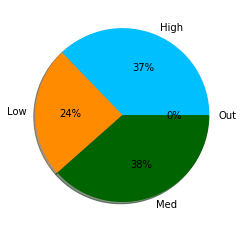

In [90]:
#Qtr Q1
plt.pie(x=Qtr_pivot.loc["Q1",:], 
             labels=["High","Low","Med","Out"], 
            colors=["deepskyblue","darkorange","darkgreen"],
            autopct='%1.0f%%',shadow=True)
plt.show()

### Pie chart - 2

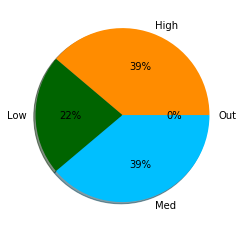

In [89]:
#Qtr Q2
plt.pie(x=Qtr_pivot.loc["Q2",:], 
             labels=["High","Low","Med","Out"], 
            colors=["darkorange","darkgreen","deepskyblue"],
            autopct='%1.0f%%',shadow=True)
plt.show()

### Pie chart - 3

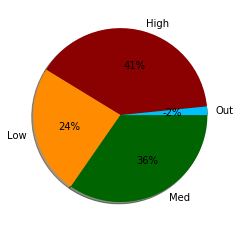

In [121]:
#Qtr Q3
plt.pie(x=Qtr_pivot.loc["Q3",:], 
             labels=["High","Low","Med","Out"], 
            colors=["darkred","darkorange","darkgreen","deepskyblue"],
            autopct='%1.0f%%',shadow=True)
plt.show()

### Pie chart - 4

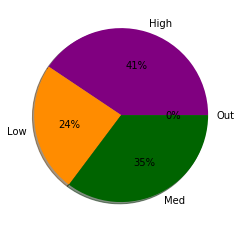

In [91]:
#Qtr Q4
plt.pie(x=Qtr_pivot.loc["Q4",:], 
             labels=["High","Low","Med","Out"], 
            colors=["purple","darkorange","darkgreen","deepskyblue"],
            autopct='%1.0f%%',shadow=True)
plt.show()